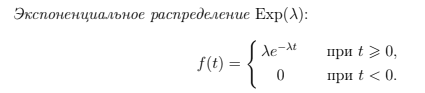




Характеристики Экспоненциального (Exp 10^-4):
Средняя наработка (T_ср): 10000.0000
Гамма (%)    | T_gamma (часов)
------------------------------
100          | -0.0000        
90           | 1053.6052      
80           | 2231.4355      
70           | 3566.7494      
60           | 5108.2562      
50           | 6931.4718      
40           | 9162.9073      
30           | 12039.7280     
20           | 16094.3791     
10           | 23025.8509     


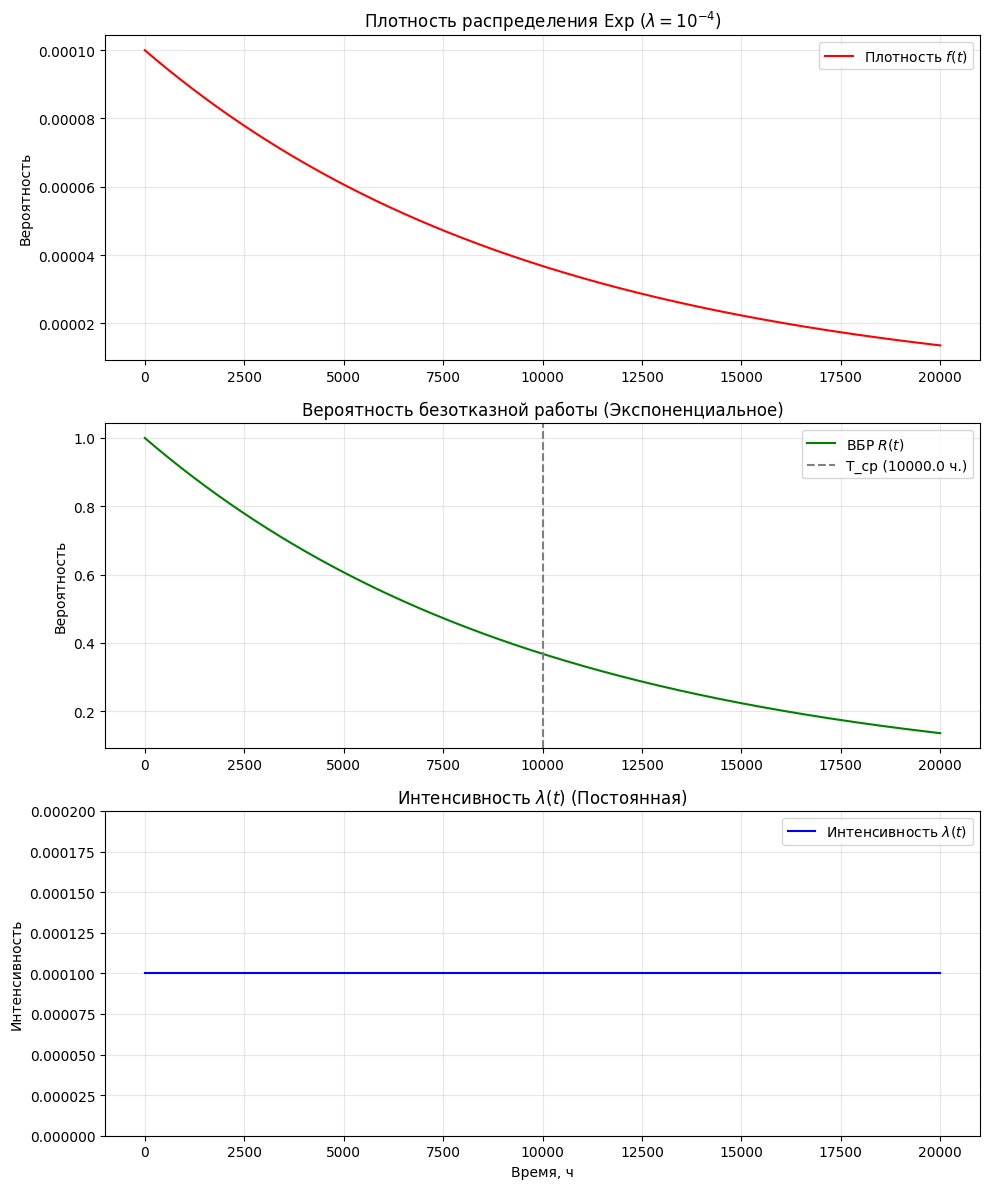

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры из тетради
lambd_exp = 1e-4  # 10^-4

# f(t)
def exp_pdf(t):
    return lambd_exp * np.exp(-lambd_exp * t)


# R(t)
def exp_reliability(t):
    return np.exp(-lambd_exp * t)


# lambda(t)
def exp_intensity(t):
    return np.full_like(t, lambd_exp)

# Gamma work time
def get_exp_gamma_worktime():
    gamma_list = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
    results = {}
    for g in gamma_list:
        if g <= 0:
            results[g] = float("inf")
        else:
            # Формула: T_g = -ln(g/100) / lambda
            t_gamma = -np.log(g / 100.0) / lambd_exp
            results[g] = t_gamma
    return results


exp_mttf = 1 / lambd_exp
exp_gamma_vals = get_exp_gamma_worktime()

print(f"\nХарактеристики Экспоненциального (Exp 10^-4):")
print(f"Средняя наработка (T_ср): {exp_mttf:.4f}")
print(f"{'Гамма (%)':<12} | {'T_gamma (часов)':<15}")
print("-" * 30)
for g in exp_gamma_vals:
    print(f"{g:<12} | {exp_gamma_vals[g]:<15.4f}")

# Plots
t_vals_exp = np.linspace(0, 20000, 1000) 
plt.figure(figsize=(10, 12))

# f(t)
plt.subplot(3, 1, 1)
plt.plot(t_vals_exp, exp_pdf(t_vals_exp), color="red", label=r"Плотность $f(t)$")
plt.title(r"Плотность распределения Exp ($\lambda=10^{-4}$)")
plt.ylabel("Вероятность")
plt.legend()
plt.grid(True, alpha=0.3)

# R(t)
plt.subplot(3, 1, 2)
plt.plot(t_vals_exp, exp_reliability(t_vals_exp), color="green", label=r"ВБР $R(t)$")
plt.axvline(x=exp_mttf, color="gray", linestyle="--", label=f"T_ср ({exp_mttf} ч.)")
plt.title("Вероятность безотказной работы (Экспоненциальное)")
plt.ylabel("Вероятность")
plt.legend()
plt.grid(True, alpha=0.3)

# lambda(t)
plt.subplot(3, 1, 3)
plt.plot(
    t_vals_exp,
    exp_intensity(t_vals_exp),
    color="blue",
    label=r"Интенсивность $\lambda(t)$",
)
plt.ylim(0, 2e-4)
plt.title(r"Интенсивность $\lambda(t)$ (Постоянная)")
plt.xlabel("Время, ч")
plt.ylabel("Интенсивность")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

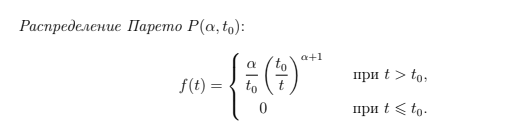



Средняя наработка (T_ср): 9.5181
Дисперсия: 125.3384
СКО: 11.1955
Гамма (%)    | T_gamma (часов)
------------------------------
100          | 5.0000         
90           | 5.2573         
80           | 5.5605         
70           | 5.9256         
60           | 6.3769         
50           | 6.9553         
40           | 7.7351         
30           | 8.8707         
20           | 10.7600        
10           | 14.9679        


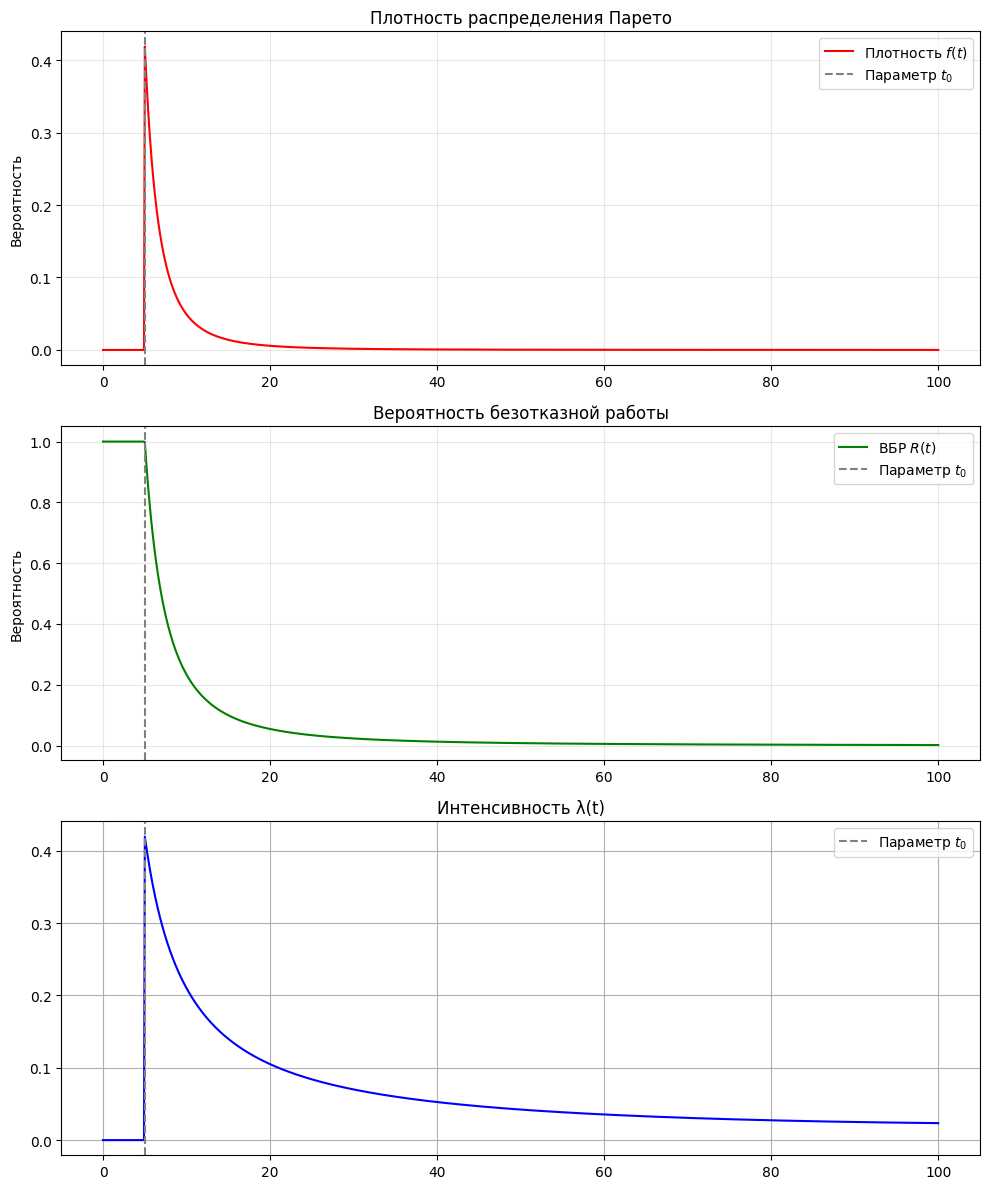

In [ ]:
import math

# Pareto params
alpha = 2.1
t_0 = 5

def integrate_by_trapezoid(f, start, end, n):
    step = (end - start) / n

    integral_sum = (f(start) + f(end)) / 2

    for i in range(1, n):
        x = start + i * step
        integral_sum += f(x)

    return step * integral_sum

# f(t)
def pareto_pdf(t):
    if t < t_0:
        return 0
    return (alpha / t_0) * ((t_0 / t))**(alpha + 1)

# R(t)
def pareto_reliability(t):
    if t <= t_0:
        return 1
    P_t = integrate_by_trapezoid(f = pareto_pdf, start = t_0, end = t, n = 1000)
    R_t = 1 - P_t

    if R_t < 0:
        R_t = 0
    if R_t > 1:
        R_t = 1

    return R_t

# T_m, mean time to failure, M[T]
def pareto_mttf():
    return integrate_by_trapezoid(f=(lambda t: t * pareto_pdf(t)), start=t_0, end=1000, n=10000)

# Lamb(t), failure intensity
def pareto_intensity(t):
    eps = 1e-5
    rel = pareto_reliability(t)
    if rel > eps:
        return pareto_pdf(t) / rel 
    else:
        return 0


# D[T]
def pareto_variance(mttf):
    sec_moment = integrate_by_trapezoid(
        f=(lambda t: (t**2) * pareto_pdf(t)), start=t_0, end=1000, n=10000
    )
    return sec_moment - (mttf**2)

# Sigma, std deviation
def pareto_deviation(variance):
    return math.sqrt(variance)

# Gamma, gamma work time
def get_pareto_gamma_worktime():
    gamma_list = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
    results = {}
    for g in gamma_list:
        if g <= 0:
            results[g] = float("inf")
        elif g > 100:
            results[g] = 0
        else:
            t_gamma = t_0 / ((g / 100.0) ** (1 / alpha))
            results[g] = t_gamma
    return results


par_mttf = pareto_mttf()
par_var = pareto_variance(par_mttf)
par_std_dev = pareto_deviation(par_var)
par_gamma_vals = get_pareto_gamma_worktime()

print(f"Средняя наработка (T_ср): {par_mttf:.4f}")
print(f"Дисперсия: {par_var:.4f}")
print(f"СКО: {par_std_dev:.4f}")
print(f"{'Гамма (%)':<12} | {'T_gamma (часов)':<15}")
print("-" * 30)
for g in par_gamma_vals:
    print(f"{g:<12} | {par_gamma_vals[g]:<15.4f}")


# Plots
import numpy as np
import matplotlib.pyplot as plt

t_vals = np.linspace(0, 100, 1000)
par_pdf_vals = [pareto_pdf(t) for t in t_vals]
par_rel_vals = [pareto_reliability(t) for t in t_vals]
lambd_vals = [pareto_intensity(t) for t in t_vals]

plt.figure(figsize=(10, 12))

# f(t)
plt.subplot(3, 1, 1)
plt.plot(t_vals, par_pdf_vals, color="red", label="Плотность $f(t)$")
plt.axvline(x=t_0, color="gray", linestyle="--", label="Параметр $t_0$")
plt.title("Плотность распределения Парето")
plt.ylabel("Вероятность")
plt.legend()
plt.grid(True, alpha=0.3)

# R(t)
plt.subplot(3, 1, 2)
plt.plot(t_vals, par_rel_vals, color="green", label="ВБР $R(t)$")
plt.axvline(x=t_0, color="gray", linestyle="--", label="Параметр $t_0$")
plt.title("Вероятность безотказной работы")
plt.ylabel("Вероятность")
plt.legend()
plt.grid(True, alpha=0.3)

# λ(t)
plt.subplot(3, 1, 3)
plt.plot(t_vals, lambd_vals, "b")
plt.axvline(x=t_0, color="gray", linestyle="--", label="Параметр $t_0$")
plt.title("Интенсивность λ(t)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

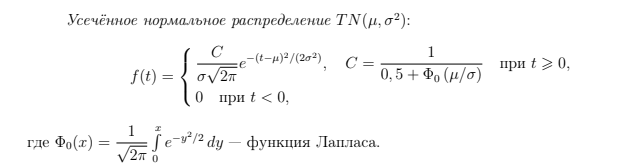




Характеристики Усеченного нормального (TN):
Средняя наработка (T_ср): 400.0058
Дисперсия: 9092.6969
СКО: 95.3556
Гамма (%)    | T_gamma (часов)
------------------------------
100          | 0.0            
95           | 243.1          
90           | 277.8          
80           | 319.7          
70           | 350.0          
60           | 375.8          
50           | 400.0          
40           | 424.2          
30           | 450.0          
20           | 480.3          
10           | 522.2          


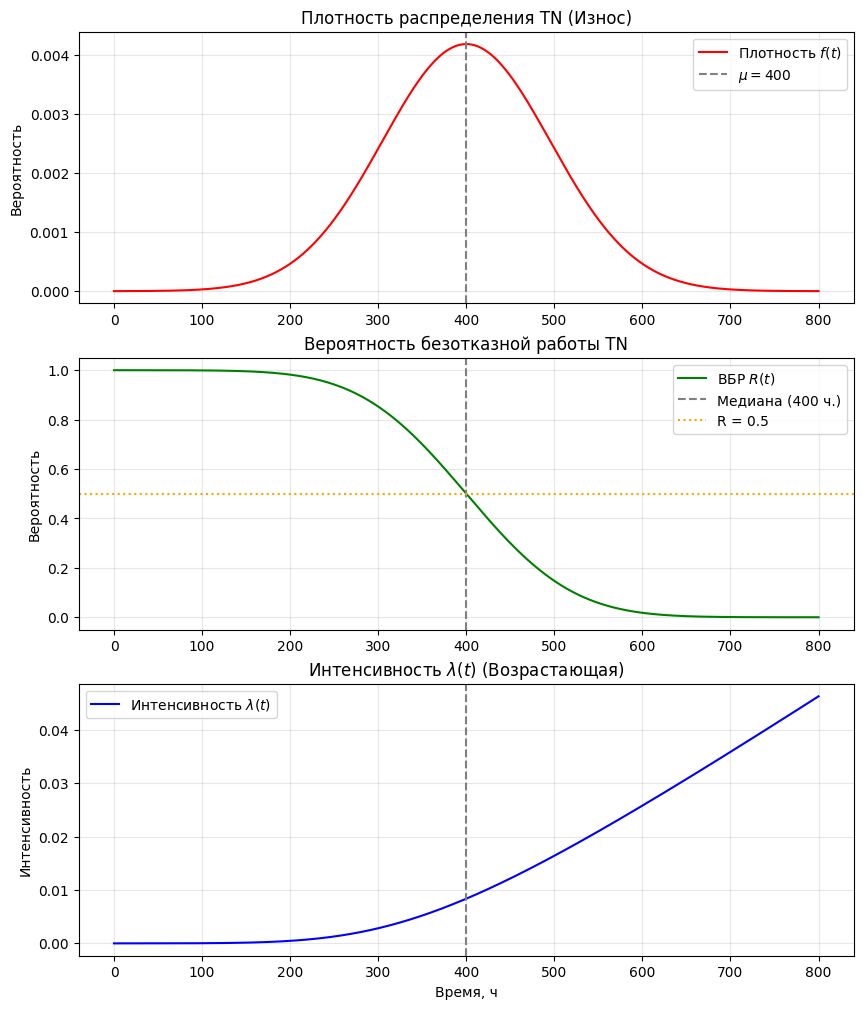

In [ ]:
import numpy as np
from scipy.stats import truncnorm

mu = 400
variance = 9095

# Sigma, std deviation
def tn_deviation(variance):
    return np.sqrt(variance)

tn_std_dev = tn_deviation(variance)

low_bound = (0 - mu) / tn_std_dev
high_bound = np.inf

tn = truncnorm(a=low_bound, b=high_bound, loc=mu, scale=tn_std_dev)

# f(t)
def tn_pdf(t):
    return tn.pdf(t)

# R(t)
def tn_reliability(t):
    return tn.sf(t)

# λ(t)
def tn_intensity(t):
    pdf = tn.pdf(t)
    rel = tn.sf(t)
    return np.where(rel > 1e-9, pdf / rel, 0)

# T_m
def tn_mttf(t):
    return tn.mean()

# Gamma, gamma work time
def get_tn_gamma_worktime():
    gamma_list = [100, 95, 90, 80, 70, 60, 50, 40, 30, 20, 10]
    results = {}
    for g in gamma_list:
        if g <= 0:
            results[g] = float("inf")
        elif g >= 100:
            results[g] = 0
        else:
            q = (100 - g) / 100.0
            results[g] = tn.ppf(q)
    return results


tn_mttf_val = tn.mean()
tn_var = tn.var()
tn_std_dev = tn.std()
tn_gamma_vals = get_tn_gamma_worktime()
print(f"\nХарактеристики Усеченного нормального (TN):")
print(f"Средняя наработка (T_ср): {tn_mttf_val:.4f}")
print(f"Дисперсия: {tn_var:.4f}")
print(f"СКО: {tn_std_dev:.4f}")
print(f"{'Гамма (%)':<12} | {'T_gamma (часов)':<15}")
print("-" * 30)
for g in tn_gamma_vals:
    print(f"{g:<12} | {tn_gamma_vals[g]:<15.1f}")

# Plots
import matplotlib.pyplot as plt
t_vals_tn = np.linspace(0, 800, 1000)
tn_pdf_vals = tn.pdf(t_vals_tn)
tn_rel_vals = tn.sf(t_vals_tn)  
tn_lambd_vals = tn_pdf_vals / np.where(tn_rel_vals > 1e-9, tn_rel_vals, np.nan)

plt.figure(figsize=(10, 12))

# f(t)
plt.subplot(3, 1, 1)
plt.plot(t_vals_tn, tn_pdf_vals, color="red", label=r"Плотность $f(t)$")
plt.axvline(x=mu, color="gray", linestyle="--", label=rf"$\mu = {mu}$")
plt.title("Плотность распределения TN (Износ)")
plt.ylabel("Вероятность")
plt.legend()
plt.grid(True, alpha=0.3)

# R(t) 
plt.subplot(3, 1, 2)
plt.plot(t_vals_tn, tn_rel_vals, color="green", label=r"ВБР $R(t)$")
plt.axvline(x=mu, color="gray", linestyle="--", label=f"Медиана ({mu} ч.)")
plt.axhline(y=0.5, color="orange", linestyle=":", label="R = 0.5")
plt.title("Вероятность безотказной работы TN")
plt.ylabel("Вероятность")
plt.legend()
plt.grid(True, alpha=0.3)

# λ(t)
plt.subplot(3, 1, 3)
plt.plot(t_vals_tn, tn_lambd_vals, color="blue", label=r"Интенсивность $\lambda(t)$")
plt.axvline(x=mu, color="gray", linestyle="--")
plt.title(r"Интенсивность $\lambda(t)$ (Возрастающая)")
plt.xlabel("Время, ч")
plt.ylabel("Интенсивность")
plt.legend()
plt.grid(True, alpha=0.3)

**Система из 3 элементов целиком**